PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [3]:
# load forest fires dataset
dataset = pd.read_csv("forestfires.csv")

In [4]:
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
dataset.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
dataset.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
numerical_feature = dataset.describe(include=["int", "float"]).columns

print(list(numerical_feature))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


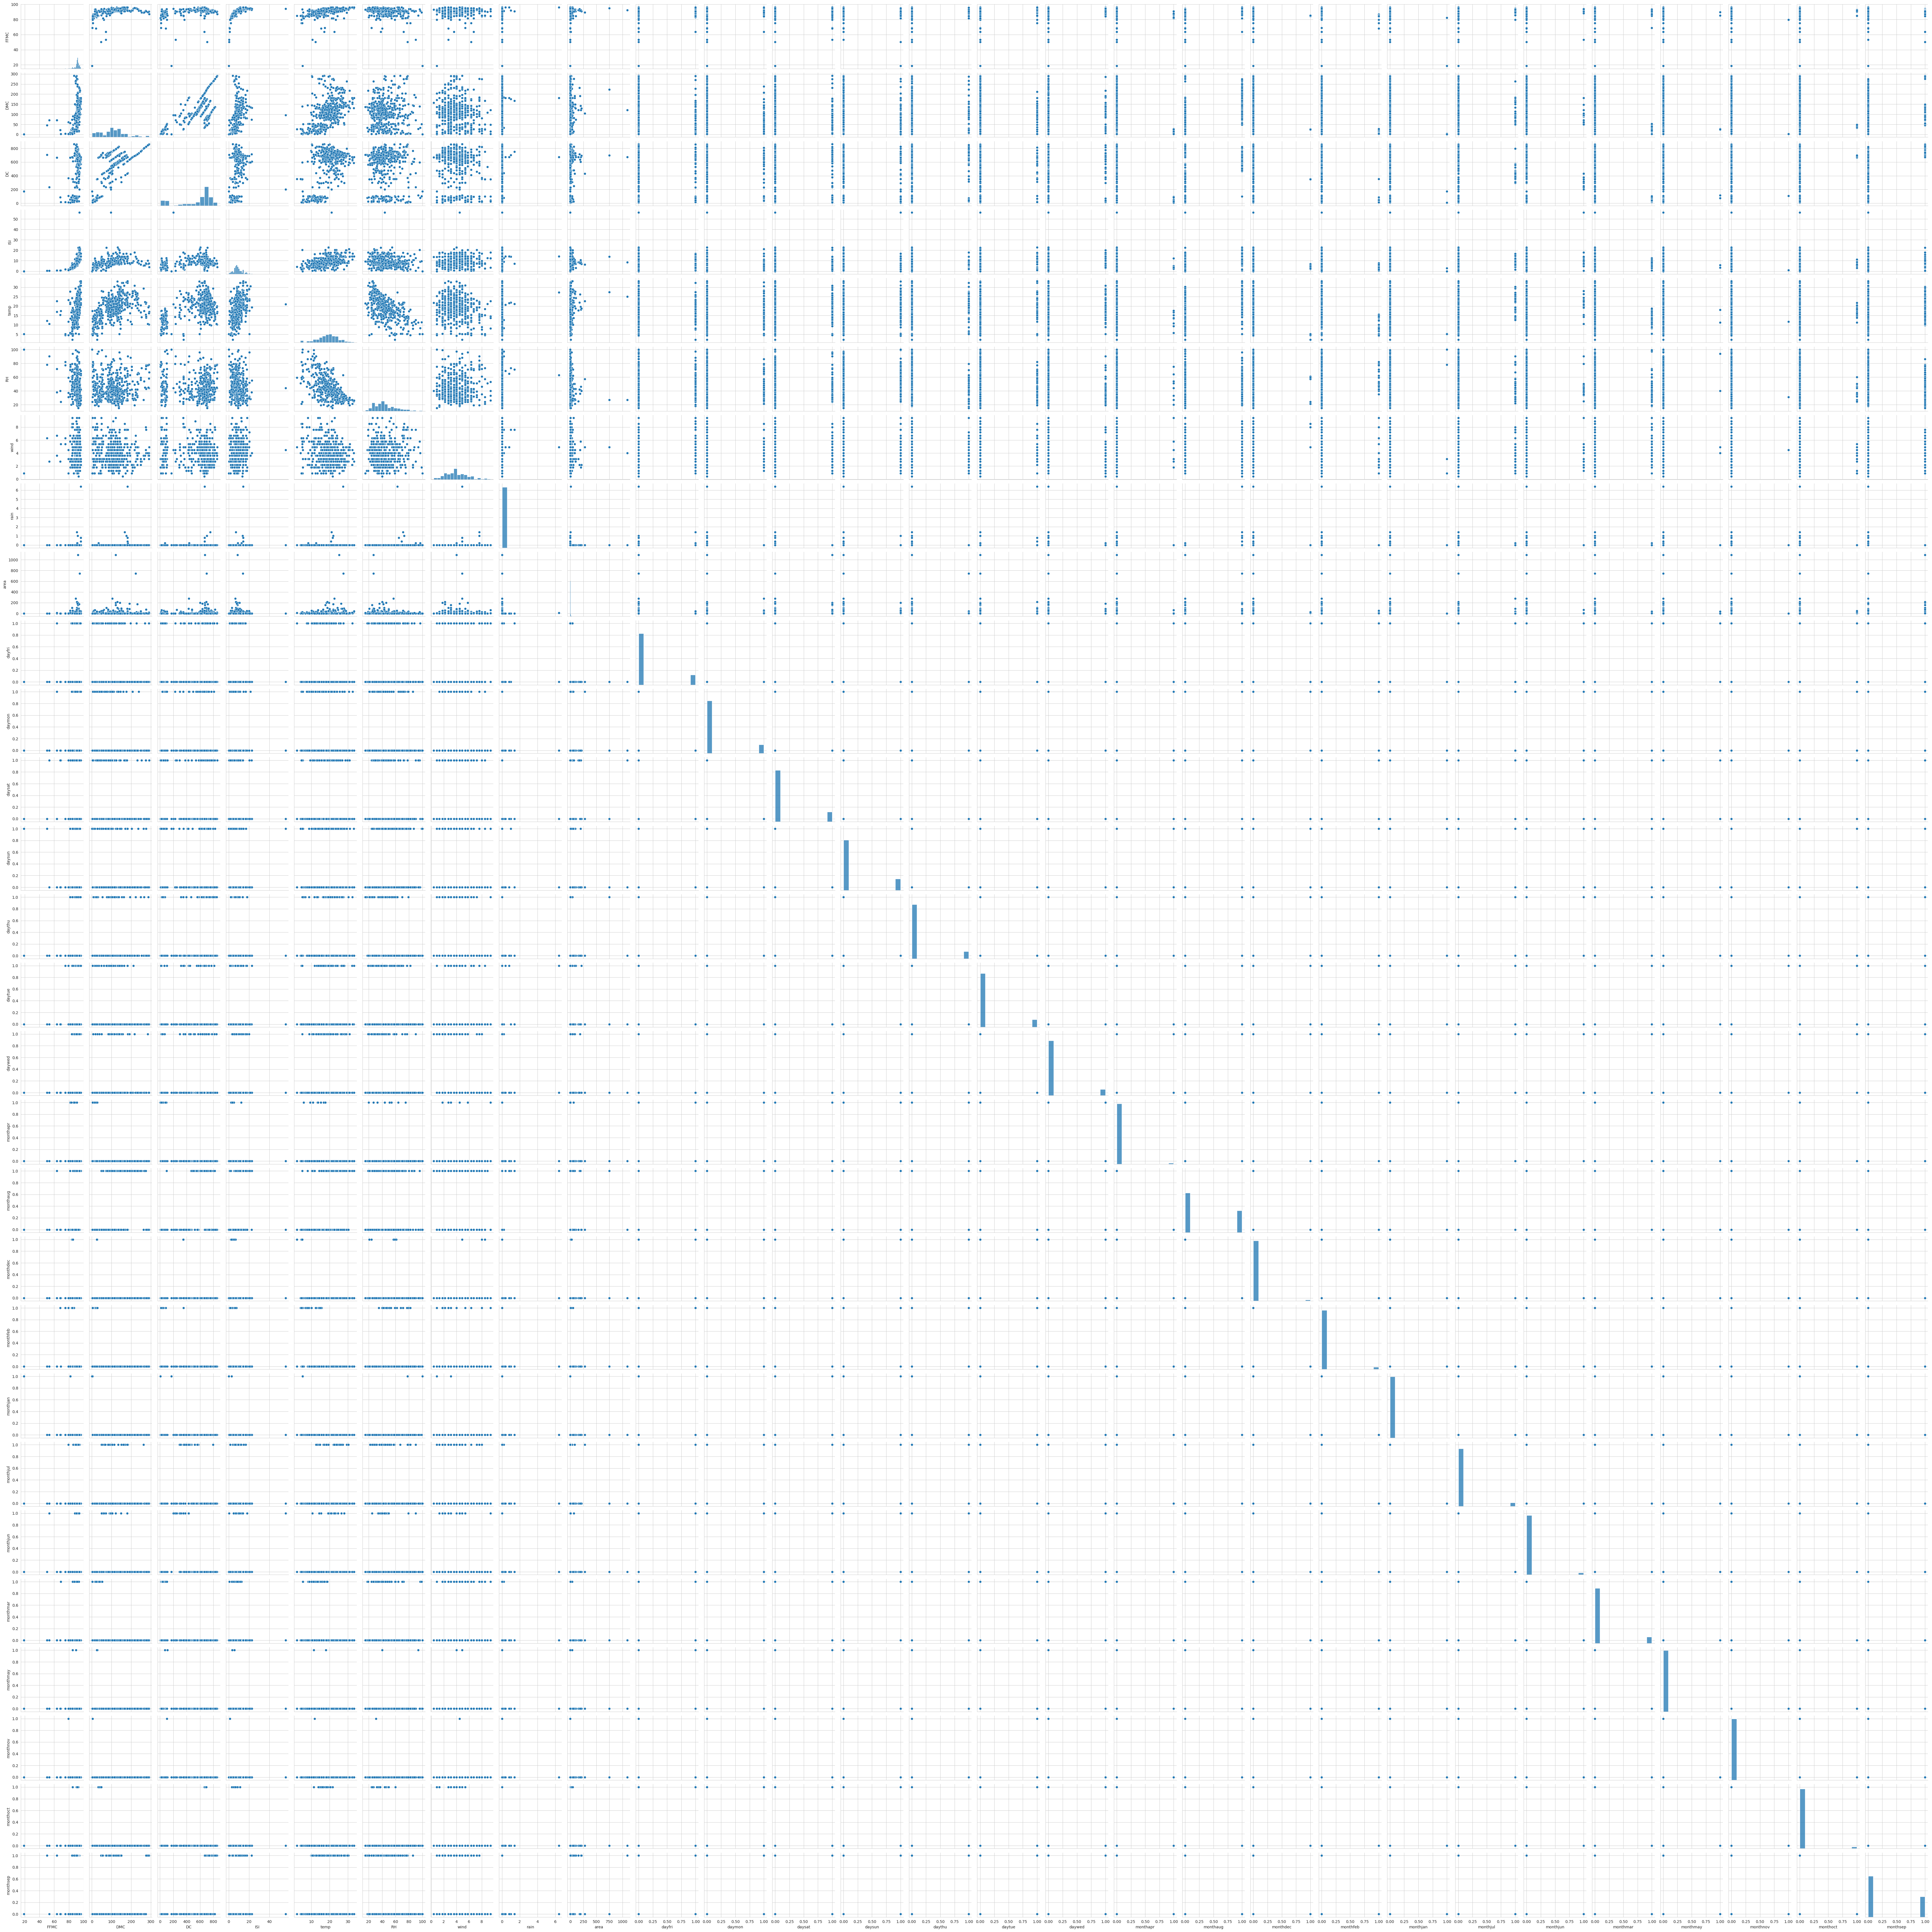

In [9]:
import seaborn as sns
sns.set_style('whitegrid')
sns.pairplot(dataset[numerical_feature])
plt.show()

In [10]:
categorical_features = dataset.describe(include=["object"]).columns

print(list(categorical_features))


['month', 'day', 'size_category']


Index(['month', 'day', 'size_category'], dtype='object')


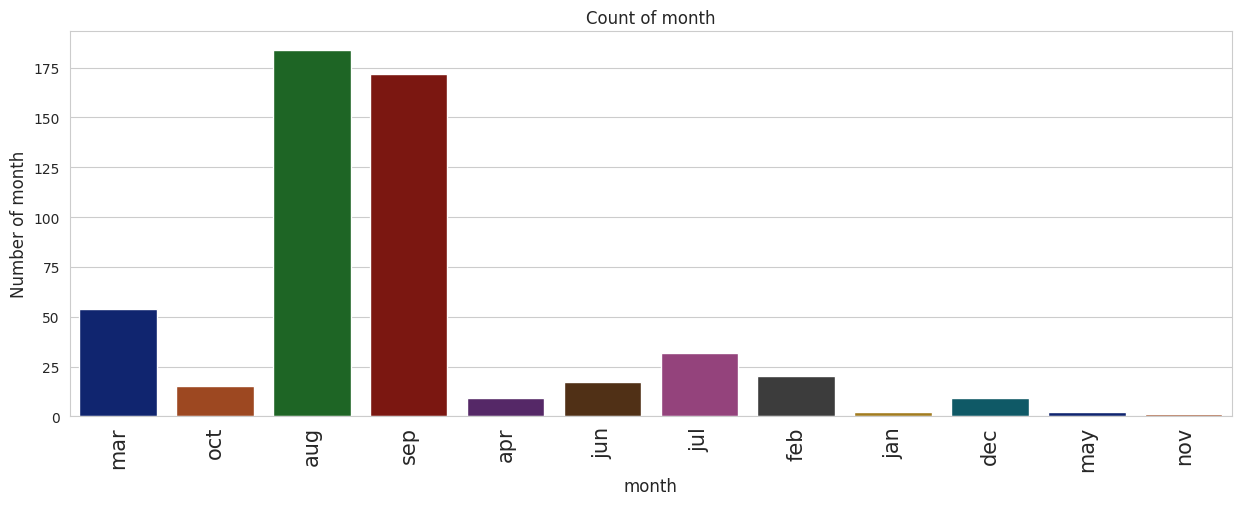

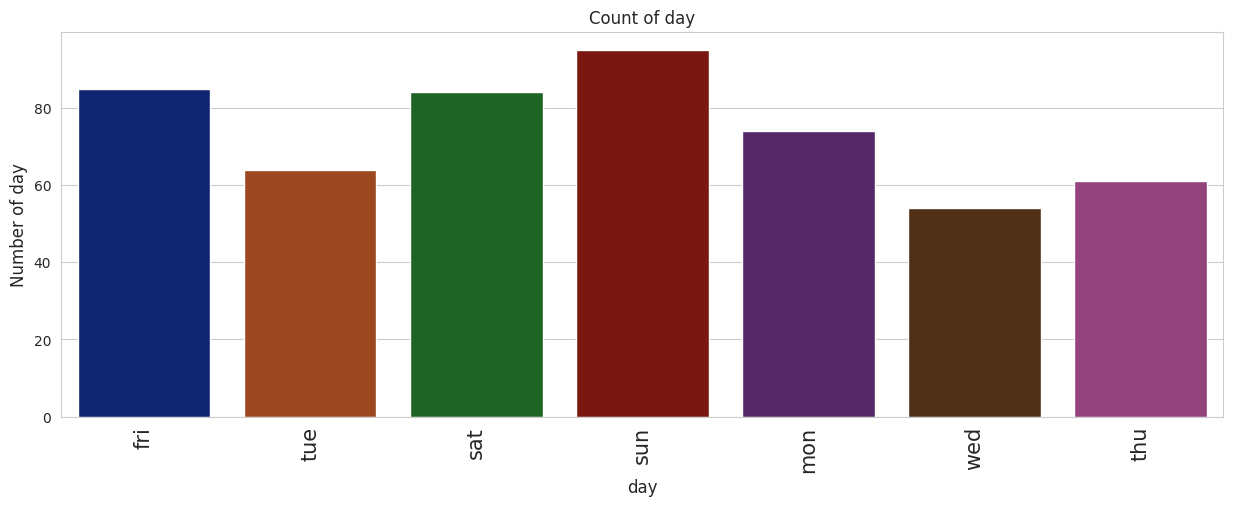

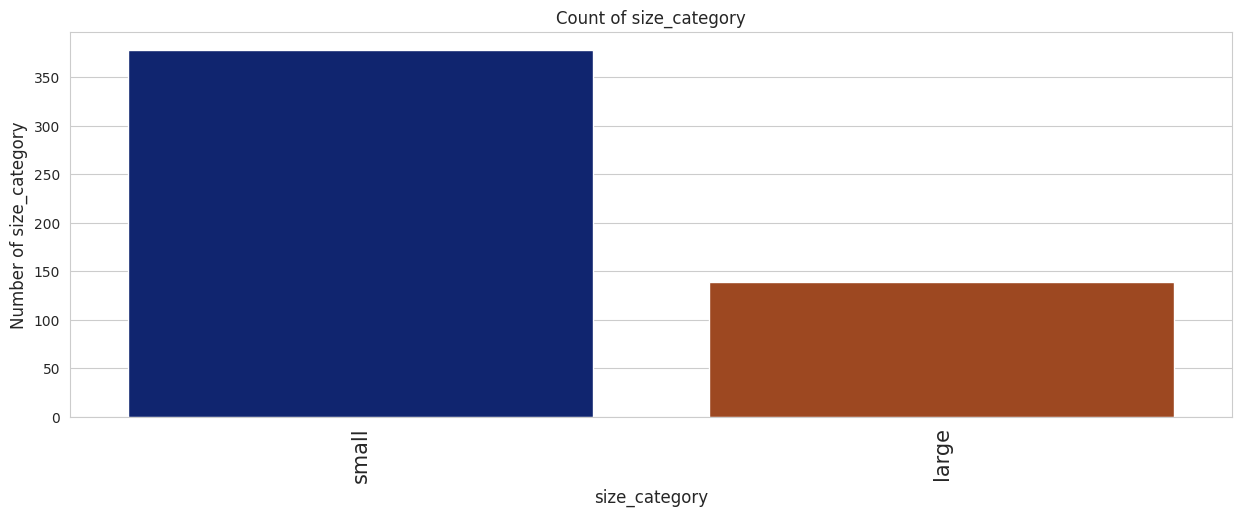

In [11]:
print(categorical_features)



for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    df = dataset.copy()
    unique = df[column].value_counts(ascending=True);


    plt.title("Count of "+ column)
    sns.countplot(data=dataset, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 90, size = 15)

    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    plt.show()

In [12]:
forest_1= dataset.iloc[:,2:30]

sc = StandardScaler()
sc.fit(forest_1)
forest_norm = sc.transform(forest_1)
forest_norm

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 28)
pca_values = pca.fit_transform(forest_norm)
print(pca_values)

var = pca.explained_variance_ratio_
print(var)

[[ 3.76670947e+00 -1.32025451e+00 -8.43971398e-01 ... -6.53345819e-02
  -5.63082526e-15 -3.06873518e-16]
 [ 3.90786263e-01  8.31061522e-01 -1.10136513e+00 ...  3.42618601e-02
  -3.05138387e-15  1.39834704e-16]
 [ 6.90415596e-01  1.17774562e+00 -1.22199841e+00 ...  2.63235187e-02
   6.49303149e-15  4.74943282e-17]
 ...
 [ 9.21634000e-01 -2.64543072e-01  2.71921606e+00 ... -2.97865814e-01
  -8.07070708e-16 -6.88309096e-17]
 [-1.62054896e+00 -9.78838231e-01  3.31987355e-01 ...  3.91949863e-02
   4.82256760e-16  5.07182797e-17]
 [ 4.07590654e+00 -3.67440726e-01 -2.47151775e-01 ... -2.50420726e-02
  -3.63261563e-17  3.83617004e-17]]
[1.35522746e-01 6.85788793e-02 6.23572652e-02 5.32713255e-02
 4.75942360e-02 4.68009902e-02 4.37490015e-02 4.28025164e-02
 4.08875728e-02 4.01633268e-02 3.92926854e-02 3.83232321e-02
 3.64221503e-02 3.63217289e-02 3.57856782e-02 3.50087806e-02
 3.35447704e-02 3.24777366e-02 3.04490902e-02 3.00246758e-02
 2.37167400e-02 2.08329788e-02 1.18357869e-02 8.88449559e-0

[13.55 20.41 26.65 31.98 36.74 41.42 45.79 50.07 54.16 58.18 62.11 65.94
 69.58 73.21 76.79 80.29 83.64 86.89 89.93 92.93 95.3  97.38 98.56 99.45
 99.91 99.99 99.99 99.99]


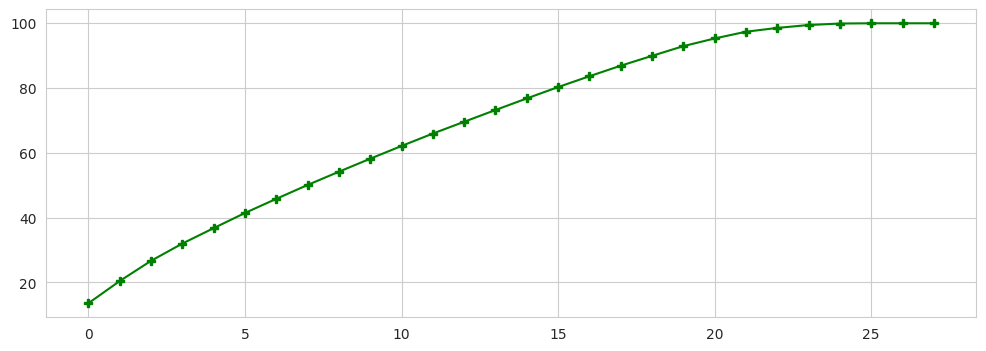

In [14]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
print(var1)

plt.figure(figsize=(12,4))
plt.plot(var1,color="green",marker = "P");

In [15]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:24],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
 'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
 'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
 'pc22','pc23','pc24']),
 dataset[['size_category']]], axis = 1)
finalDf.size_category.replace(('large','small'),(1,0),inplace=True)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,size_category
0,3.766709,-1.320255,-0.843971,-1.994738,-1.453359,0.693985,0.308104,-0.019764,0.010161,-0.437314,...,-0.197543,-0.021839,0.688958,0.563603,-0.439596,-0.926619,-0.405425,-0.118719,-0.017933,0
1,0.390786,0.831062,-1.101365,1.400671,2.869388,0.965898,-2.795574,0.041095,-0.548879,0.104500,...,-2.503167,0.499649,0.563706,-0.703319,-1.535718,-0.892995,0.836590,0.204975,0.290771,0
2,0.690416,1.177746,-1.221998,2.442038,1.090630,0.390801,-1.586675,-2.159336,-0.090580,0.260888,...,-2.545144,-0.658411,-0.423618,0.860550,-1.195230,-0.297870,0.743648,0.081757,0.345915,0
3,3.359951,-1.161443,0.385728,-2.118328,-1.949601,1.027664,-0.179422,-0.250227,-0.620329,-1.343189,...,-0.040887,0.017843,0.332572,1.164745,-1.632741,-0.817618,1.523710,-0.342302,-0.378420,0
4,2.974329,-0.842626,1.327788,0.038086,-1.124763,-0.574676,-0.777155,0.303635,0.861126,-2.024719,...,0.844431,1.014944,-0.618231,0.822853,-1.794109,-0.723371,2.020419,-0.545591,0.161735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.087560,0.153964,1.241810,1.536581,0.372425,-1.133422,-0.362287,0.766946,0.818745,-0.289632,...,0.300522,0.513876,0.539642,-0.052958,1.898628,-1.441786,-0.821192,-1.205707,-0.698666,1
513,0.794366,-0.083966,2.670485,0.284995,0.223323,-0.904232,-0.014849,0.107226,1.340049,-0.147246,...,0.342367,0.485571,0.580150,0.384984,0.086251,-0.970693,-1.353365,-1.254890,-1.212175,1
514,0.921634,-0.264543,2.719216,-0.019643,0.242195,-0.966939,-0.118080,0.123010,1.290364,-0.177553,...,0.332816,0.344047,0.122409,0.313948,0.211157,-0.777731,-1.736711,-1.154127,-1.230040,1
515,-1.620549,-0.978838,0.331987,1.256638,-0.408164,0.735698,0.815510,-1.398344,0.076379,-0.005814,...,-0.011739,-1.035533,-0.774382,-0.216315,0.515791,0.080575,-0.055548,-0.067502,-0.311027,0


In [16]:
array = finalDf.values
X = array[:,0:24]
Y = array[:,24]

In [17]:
pip install scikeras

In [18]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam

In [19]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=24, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [20]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.952 total time=   3.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.769 total time=   3.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.641 total time=   1.6s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.728 total time=   1.8s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.854 total time=   2.8s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.777 total time=   1.1s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.748 total time=   1.1s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................
[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=0.942 total time=   1.9s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................
[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.827 total time=   1.9s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................
[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.825 total time=   1.8s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................
[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.825 total time=   3.5s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................
[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.864 total time=   2.3s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................
[CV 1/5; 9/9] END ....batch_

In [21]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8721807318894698, using {'batch_size': 40, 'epochs': 100}
0.7888909634055266,0.10665834138513489 with: {'batch_size': 10, 'epochs': 10}
0.856665421956684,0.07149341637706184 with: {'batch_size': 10, 'epochs': 50}
0.8586445108289767,0.07109322522888643 with: {'batch_size': 10, 'epochs': 100}
0.7733943241224794,0.10000299785625456 with: {'batch_size': 20, 'epochs': 10}
0.8508961911874533,0.08183576870656084 with: {'batch_size': 20, 'epochs': 50}
0.8586631814787153,0.07405531464298468 with: {'batch_size': 20, 'epochs': 100}
0.7750933532486931,0.1529318196915352 with: {'batch_size': 40, 'epochs': 10}
0.8567587752053771,0.04527444311354816 with: {'batch_size': 40, 'epochs': 50}
0.8721807318894698,0.07016703419705181 with: {'batch_size': 40, 'epochs': 100}


#### Tuning of Hyperparameters:- Learning rate and Drop out rate

In [22]:
from keras.layers import Dropout

In [23]:

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(16,input_dim = 24,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50,dropout_rate = dropout_rate, learning_rate = learning_rate)


# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   6.1s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.798 total time=   2.6s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.738 total time=   2.6s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.825 total time=   6.6s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.893 total time=   6.2s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [24]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.856665421956684, using {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8508775205377148,0.08971746688520259 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.8432225541448842,0.05175205045205291 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7753360716952951,0.1425034402794253 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8450709484690068,0.08172671671429 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.8509335324869305,0.08857367649329509 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.755899925317401,0.1467427362493709 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.8198469006721434,0.10090878030725238 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.856665421956684,0.08388844890519445 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7364077669902913,0.15285944521525857 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [25]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(16,input_dim = 24,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50, activation_function= activation_function, init = init)



# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.962 total time=   6.1s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.788 total time=   2.8s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.757 total time=   2.9s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.835 total time=   3.6s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.825 total time=   3.6s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [26]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9419529499626588, using {'activation_function': 'tanh', 'init': 'normal'}
0.833495145631068,0.06971635612903193 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8005414488424197,0.09242910008862423 with: {'activation_function': 'softmax', 'init': 'normal'}
0.8353995519044062,0.06780480827775295 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8605302464525766,0.07273503813647116 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8741038088125468,0.06391767071104298 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825242718447,0.15435061257849172 with: {'activation_function': 'relu', 'init': 'zero'}
0.9225914861837191,0.054989371191434114 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9419529499626588,0.03708464824912243 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825242718447,0.15435061257849172 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9419529499626588,0.03857956252806905 with: {'activatio

#### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [27]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 24,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Define the grid search parameters

neuron1 = [10,16,24]
neuron2 = [6,8,12]

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50, neuron1 = neuron1,neuron2 = neuron2)



# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=10, neuron2=6.......................................
[CV 1/5; 1/9] END ........neuron1=10, neuron2=6;, score=1.000 total time=   2.7s
[CV 2/5; 1/9] START neuron1=10, neuron2=6.......................................
[CV 2/5; 1/9] END ........neuron1=10, neuron2=6;, score=0.913 total time=   3.5s
[CV 3/5; 1/9] START neuron1=10, neuron2=6.......................................
[CV 3/5; 1/9] END ........neuron1=10, neuron2=6;, score=0.951 total time=   3.5s
[CV 4/5; 1/9] START neuron1=10, neuron2=6.......................................
[CV 4/5; 1/9] END ........neuron1=10, neuron2=6;, score=0.903 total time=   3.1s
[CV 5/5; 1/9] START neuron1=10, neuron2=6.......................................
[CV 5/5; 1/9] END ........neuron1=10, neuron2=6;, score=0.922 total time=   3.5s
[CV 1/5; 2/9] START neuron1=10, neuron2=8.......................................
[CV 1/5; 2/9] END ........neuron1=10, neuron2=8;,

In [28]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.95739357729649, using {'neuron1': 10, 'neuron2': 8}
0.9380321135175503,0.034939585666011984 with: {'neuron1': 10, 'neuron2': 6}
0.95739357729649,0.023389011399017258 with: {'neuron1': 10, 'neuron2': 8}
0.9283980582524272,0.04549918972284019 with: {'neuron1': 10, 'neuron2': 12}
0.9379947722180733,0.032815779579015956 with: {'neuron1': 16, 'neuron2': 6}
0.9419156086631816,0.026692134457620406 with: {'neuron1': 16, 'neuron2': 8}
0.9245892457057506,0.03617630026965008 with: {'neuron1': 16, 'neuron2': 12}
0.926493651979089,0.04419724156444186 with: {'neuron1': 24, 'neuron2': 6}
0.9438386855862584,0.019861710474016286 with: {'neuron1': 24, 'neuron2': 8}
0.9244958924570575,0.04250640670043042 with: {'neuron1': 24, 'neuron2': 12}


#### Training model with optimum values of Hyperparameters

In [29]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 24,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(12,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 50)

# Fitting the model

model.fit(X,Y)

# Predicting using trained model

y_predict = model.predict(X)

# Printing the metrics
print("Accuracy = ",accuracy_score(Y,y_predict))

Accuracy =  0.9574468085106383
